**离散分布：二项、泊松、几何**

**连续分布：均匀、正态、指数**

* stats.*distribution*.rvs()
* stats.*distribution*.cdf()
* stats.*distribution*.ppf()
* stats.*distribution*.pdf()
* stats.*distribution*.pmf()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# The Uniform Distribution 均匀分布

In [3]:
# 随机生成 服从均匀分布的数据集，数据量size=100000,取值范围 0-10 。rvs:random variates，返回的是array，需要再pd.DataFrame
uniform_data = stats.uniform.rvs(size=100000,
                                 loc = 0,
                                 scale = 10)

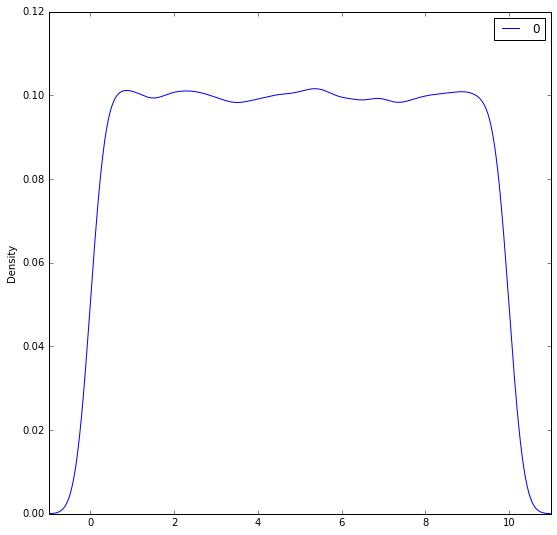

In [4]:
# 画出概率（密度）分布图

pd.DataFrame(uniform_data).plot(kind='density',
                  figsize=(9,9),
                  xlim=(-1,11))

## Scipy中的概率密度 相关的函数：

In [5]:
#-stats.distribution.rvs()   generates random numbers from the specified distribution. 
#-stats.distribution.cdf()   Cumulative Distribution Function 累积分布函数
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

# 该数据集服从均匀分布，随机抽取的值在2.5及以下的概率为：

0.25

In [6]:
# -stats.distribution.ppf()  Percent Point Funcion is the inverse of cdf(): 已知概率，求cutoff value
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

In [7]:
# 概率密度函数 probability density function
#-stats.distribution.pdf() gives you the probability density (height of the distribution) at a given x value.

for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   
    
#-1，11  超出了[0,10],所以概率为0

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


#### 随机种子使得随机具有在reproducibility，再现性，这也说明了不是真随机，是伪随机

# The Normal Distribution 正态分布
* A normal distribution is defined by its center (mean) and spread (standard deviation.). 
* 经验法则：1：68%的数据落在距离中心(均值点）1个标准差的范围内；2：95%；3：99.7%

In [8]:
prob_under_minusone = stats.norm.cdf(x=-1, 
                                     loc=0,  # mean
                                     scale=1)  # std
prob_over_1 =1- stats.norm.cdf(x=1,
                             loc=0,
                             scale=1)

between_prob = 1-(prob_under_minusone + prob_over_1)

print(prob_under_minusone,prob_over_1,between_prob)

0.158655253931 0.158655253931 0.682689492137


### Plot normal distribution areas*

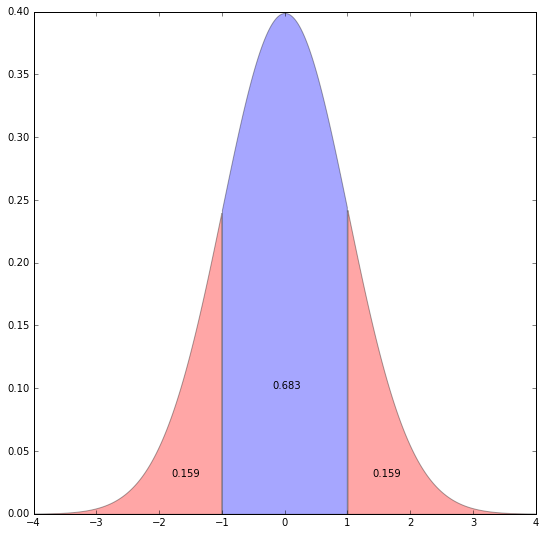

In [9]:
plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01),                    # 一段x范围
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) , # x范围内的所有概率，构成该范围内的概率密度曲线
                 facecolor='red',                            # 对 概率密度曲线下的面积 填色
                 alpha=0.35)           # 颜色浓度参数  

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minusone,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

### 找到quantiles of normal distribution 是统计检验中经常要做的事。You can check normal distribution quantiles with stats.norm.ppf():

In [9]:
print(stats.norm.ppf(q=0.025)) 
print(stats.norm.ppf(q=0.975))

-1.95996398454
1.95996398454


# The Binomial Distribution 二项分布

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts   8  87  458  1142  2056  2473  2093  1129  446  98  10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac9f400>]], dtype=object)

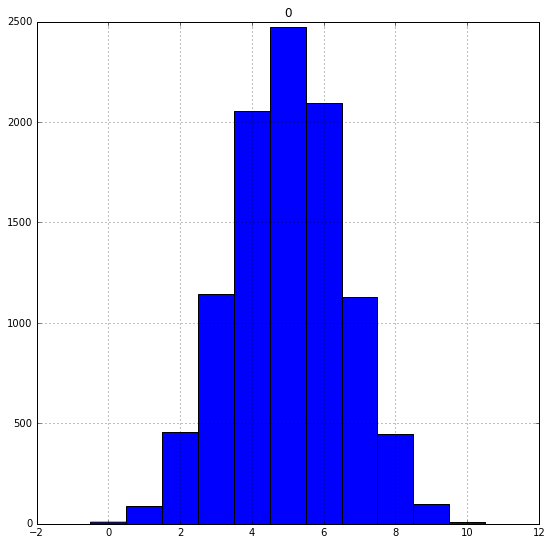

In [10]:
# 抛硬币，每次试验抛10次，以下为在10000次试验中，每次试验出现1、2、3..10次正面的频数

fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials
print(pd.crosstab(index='counts',columns=fair_coin_flips))       # 交叉表
      
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)   #画直方图
                                

#### 貌似对称，那么改变下success probability：

col_0   1   3   4    5    6     7     8     9     10
row_0                                               
counts   1   6  53  216  907  2076  2982  2679  1080


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac3a400>]], dtype=object)

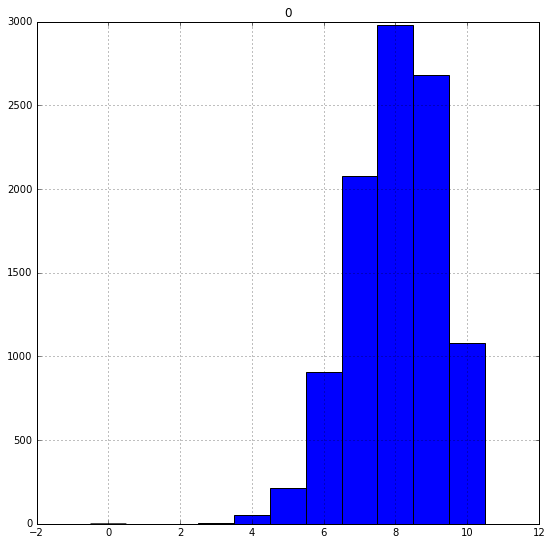

In [11]:
biased_coin_flips = stats.binom.rvs(n=10,
                                      p=0.8,
                                      size=10000)

print(pd.crosstab(index='counts',columns=biased_coin_flips))

pd.DataFrame(biased_coin_flips).hist(range=(-.5,10.5),bins=11)

#可以看出 10次中出现8次正面的频数最多，符合p=0.8 的概率

#### cdf()： The cdf() function lets us check the probability of achieving a number of successes 【within a certain range】:

In [12]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less 出现 ≤5 次正面的概率
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

In [13]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000003

In [14]:
# 恰好8次成功的概率：
stats.binom.cdf(k=8,n=10,p=0.8)-stats.binom.cdf(k=7,n=10,p=0.8)
#或者用概率质量函数计算概率，见后文

0.30198988799999998

* For __continuous__ probability density functions, you usf __pdf()__ to check the probability density at a given x value.


* For __discrete__ distributions like the binomial, use __pmf()__ probability mass functions to check the mass(proportion of observations) at a given number of successes k:

In [15]:
stats.binom.pmf(k=8,     # Probability of k = 8 successes
                p=0.8,
                n=10)

0.30198988799999998

# The Geometric and Exponential Distributions 
* stats.geom 几何分布（不同于超几何分布）是离散型分布，在n伯努利试验中，试验k次才得到第1次成功的概率

* stats.expon 指数分布，是连续型分布，用于计算完成一项任务所需时间的概率，或者说间隔时间为X的概率

最多试验几次:  15
col_0     1     2     3    4    5    6   7   8   9   10  11  12  15
row_0                                                              
Counts  5052  2485  1212  629  329  141  69  38  14  16  10   4   1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1033bc3c8>]], dtype=object)

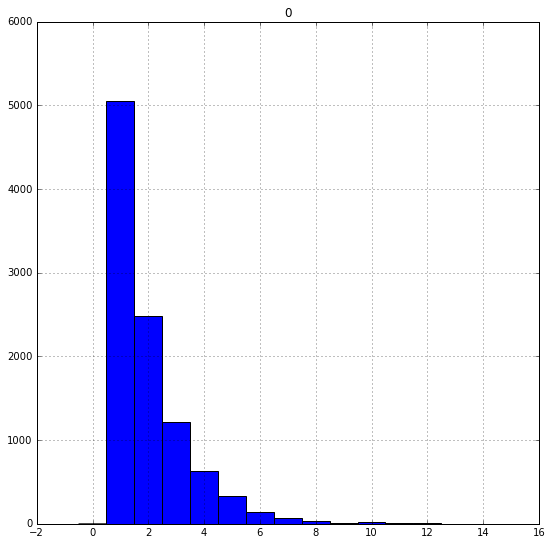

In [16]:
np.random.seed(12)

#以抛硬币出现正面（head）为例
flips_till_heads = stats.geom.rvs(size=10000,
                                  p=0.5)

print('最多试验几次: ',max(flips_till_heads))
print(pd.crosstab(index='Counts',columns=flips_till_heads))

pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5),
                                    bins=max(flips_till_heads)+1)


In [17]:
# 用cdf() 累积分布函数来得到需要试验5次以上才出现正面的概率：
first_five = stats.geom.cdf(k=5,
                            p=0.5)
1-first_five

0.03125

In [18]:
# 用pmf() probability mass function 计算具体的第k次才成功的概率
stats.geom.pmf(k=2,     # stas.geom. 没有pdf()函数
               p=0.5)

0.25

### stats.expon

![exponential](expon.png)

In [19]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,
                         scale=1) #Arrival rate μ

1-prob_1

0.36787944117144233

* Note: The average arrival time for the exponential distribution is equal to 1/arrival_rate.

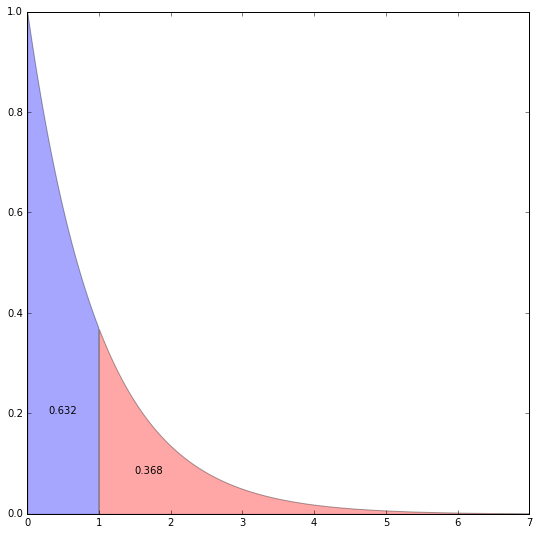

In [20]:
plt.fill_between(x=np.arange(0,1,0.01),
                 y1= stats.expon.pdf(np.arange(0,1,0.01)),
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01),
                 y1= stats.expon.pdf(np.arange(1,7,0.01)),
                 facecolor='red',
                 alpha=0.35)

plt.text(x=0.3,y=0.2,s=round(prob_1,3))
plt.text(x=1.5,y=0.08,s=round(1-prob_1,3))

# The Poisson Distribution
* 离散型随机变量，用于估计特定时间段或空间段内，某件事发生的次数（例如15分钟内，公交车到达的数量）
* 发生次数的概率。（15分钟内，公交车到达数量为X的概率）
![a](a.png)

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3645  3665  1887  618  161  20  3  1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a5a24e0>]], dtype=object)

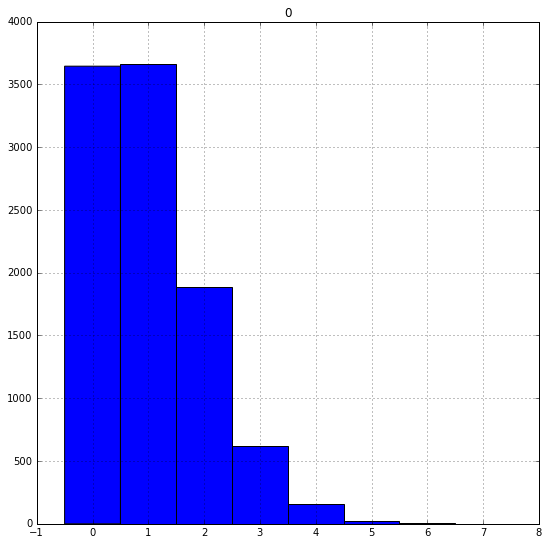

In [21]:
np.random.seed(1)

arrival_rate_1 = stats.poisson.rvs(size=10000,
                                   mu=1)

print(pd.crosstab(index='counts',columns=arrival_rate_1))

pd.DataFrame(arrival_rate_1).hist(range=(-.5,max(arrival_rate_1)+0.5),
                                  bins = max(arrival_rate_1)+1)

# col_0:到达0、1、2、..7次的频数
# 观察发现：每个时间段到达6或7次的（频数）很少；频数大的次数是0、1， 或者说某时间段里到达数为0、1的概率很大。

col_0   0   1   2   3    4    5    6    7     8     9  ...   15   16   17  18  \
row_0                                                  ...                      
Counts   2   3  32  84  154  385  623  949  1093  1286 ...  345  227  110  65   

col_0   19  20  21  22  23  24  
row_0                           
Counts  27  15   4   6   2   2  

[1 rows x 25 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac50cf8>]], dtype=object)

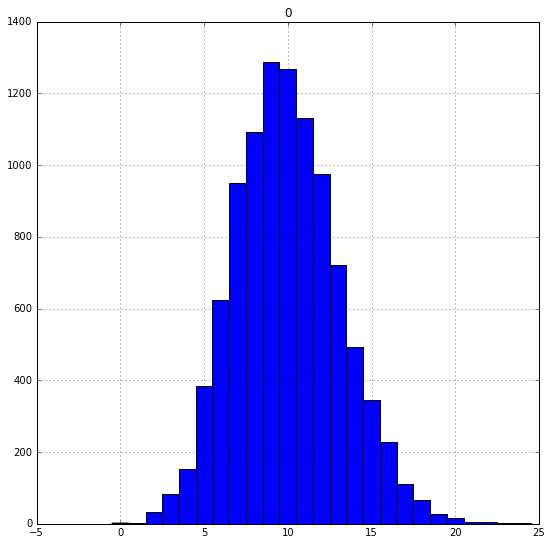

In [22]:
#当到达率μ变大时，到达0、1次的频数也变小，分布变得对称：
np.random.seed(1)
arrival_rate_10 = stats.poisson.rvs(size=10000,
                                     mu=10)

print(pd.crosstab(index='Counts',columns=arrival_rate_10))

pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5),
                                   bins = max(arrival_rate_10)+1)

In [23]:
#cdf() to check the probability of achieving more or less than a certain number of successes 
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less.
                  mu=10)   # With arrival rate 10.

0.067085962879031888

In [24]:
# pmf() to check the probability of obtaining [a specific number ]of successes:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372